# Inaugural Project - Housing demand and taxation
### Introduction to Programming and Numerical Analysis

**University of Copenhagen, 21 March 2021**

Hand-in by Magnus Bugge, Jens Brøndum Petersen, and Frederik Bach

# Housing demand and taxation

We consider a household looking to buy a home. The household is endowed with an amount of cash-on-hand, $m$, that may spent on housing as well as other consumption $c$. The household derives utility from housing by a measure of its quality, $h$. A home of quality $h$ has the price $ph$ and is subject to progressive taxation and mortgage costs, summarized by the function $\tau(\cdot)$. The objective of the household is therefore to choose optimal amounts of housing and consumption.

# Problem 1 - Household utility maximization 

The representative household's problem is given by:

$$c^*, h^* = \arg \underset{c,h}{\max} c^{1-\phi}h^\phi \\
                s.t. \\
    \tilde{p}_h = p_h\varepsilon \\
              m = \tau(p_h,\tilde{p}_h)+c \\
\tau(p_h,\tilde{p}_h = rp_h+\tau^h\tilde{p}_h+\tau^p\max\{\tilde{p}_h-\bar{p},0\}$$ 

We take as given the default parameters: 
$\phi = 0.3, \varepsilon = 0.5, r = 0.03, \tau^g = 0.012, \tau^g = 0.004, 
\bar{p} = 3$

The parameters are defined in the dictionary 'parameters' in the code section below, and the maximization procedure is explained step-by-step in the code.

In [9]:
# import numpy for array operations, pyplot for plots, and the scipy optimize module for optimization
import numpy as np
from scipy import optimize

# create a dictionary containing the parameters given
parameters = {'phi': 0.3, 'eps': 0.5, 'r': 0.03, 'tau_g': 0.012, 
              'tau_p': 0.004, 'p_bar': 3, 'm': 0.5}


# now, we construct the utility function along with the maximization constraints as individual functions
def utility_function(c, h, parameters):
    """ Defines utility function based on consumption bundle and parameters        
    
    Args:
        c (float): amount of consumption in non-housing goods 
        h (float): housing consumption
        parameters (dict): dictionary of parameters wrt. policy and preferences
        
    Returns:
        u (float): utility        
    """

    u = c**(1-parameters['phi']) * h**parameters['phi']
    return u


def taxes_paid(h, parameters):
    """ Calculates the cash amount of taxes paid by the individual household given the choice of house quality      
    
    Args:
        h (float): housing consumption
        parameters (dict): dictionary of parameters wrt. policy and preferences
        
    Returns:
        taxes (float): cash amount of taxes paid
    """
    
    taxes = parameters['r'] * h + parameters['tau_g'] * h * parameters['eps'] + parameters['tau_p'] * max(h * parameters['eps'] - parameters['p_bar'], 0)
    return taxes
    
    
def budget_constraint(h, parameters):
    """ Defines the budget constraint of the household, which says that consumption is equal to the cash-on-hand minus tax expenditure   
    
    Args:
        h (float): housing consumption
        parameters (dict): dictionary of parameters wrt. policy and preferences
        
    Returns:
        c (float): the upper limit (budget constraint) for consumption in non-housing goods
    """ 
    
    c = parameters['m'] - taxes_paid(h, parameters)
    return c

# we define the objective function (maximize it by minimizing the negative utility function)
def value_of_choice(h, parameters):
    """ Defines the objective function to be optimized
    
    Args:
        h (float): housing consumption
        parameters (dict): dictionary of parameters wrt. policy and preferences
        
    Returns:
        -utility_function (float): the negative of the implied utility from consumption c and h
    """ 

    c = budget_constraint(h, parameters)
    return -utility_function(c, h, parameters)


# use the optimizer from the scipy package to optimize value_of_choice
def solver(parameters):
    """ Solves the household's utility maximization problem given the parameters
    Args:
        parameters (dict): dictionary of parameters wrt. policy and preferences
        
    Returns:
        h (float): optimal choice of housing
    """ 
    solution = optimize.minimize_scalar(
    value_of_choice, bounds = None, args = (parameters))
    h = solution.x
    return h

# save the optimal consumption bundle and the implied utility the variables h, c, and u
h = solver(parameters)
c = budget_constraint(h, parameters)
u = utility_function(c, h, parameters)

# print the solution
print(f'\nThe household chooses c = {c:.2f} units of consumption and a house of quality h = {h:.2f}')
print(f'The utility derived from the optimal consumption bundle is u({c:.2f}, {h:.2f}) = {u:.2f}')


The household chooses c = 0.35 units of consumption and a house of quality h = 4.17
The utility derived from the optimal consumption bundle is u(0.35, 4.17) = 0.74


# Problem 2 - Plot of c* and h* as functions of m in the range 0.4 to 1.5

        m          h       c
0    0.40   3.333333  0.2800
1    0.41   3.416667  0.2870
2    0.42   3.500000  0.2940
3    0.43   3.583333  0.3010
4    0.44   3.666667  0.3080
..    ...        ...     ...
105  1.45  11.542105  1.0234
106  1.46  11.621053  1.0304
107  1.47  11.700000  1.0374
108  1.48  11.778948  1.0444
109  1.49  11.857895  1.0514

[110 rows x 3 columns]




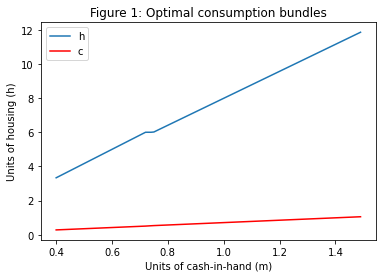

In [15]:
# import the pandas package for dataframe
import pandas as pd

# define a range of endowments, m, to be iterated over
m_range = np.arange(0.4, 1.5, 0.01).tolist()

# initialize an empty array
solutions = []

# use the optimization algorithm from problem 1 for all m's in m_range
for m in m_range:
    parameters['m'] = m
    h = solver(parameters)
    c = budget_constraint(h, parameters)
    solutions.append([m, h, c])

# save the solutions in a pandas dataframe and print it
solutions = pd.DataFrame(solutions, columns=["m", "h", "c"])
print(solutions)
print('\n')

# Now, after obtaining a dataframe of 110 solutions to the household's problem, we plot it using the matplotlib package
import matplotlib.pyplot as plt

# plot the solution dataframe
m_axis = plt.gca()
solutions.plot(x = 'm', y = 'h', ax = m_axis, title = 'Figure 1: Optimal consumption bundles');
solutions.plot(x = 'm', y = 'c', ax = m_axis, color = 'red');
plt.ylabel('Units of housing (h)')
plt.xlabel('Units of cash-in-hand (m)')
plt.show()

From figure 1, we see that the consumption bundle is increasing in both goods for increasing endowments, which is a result of the monotonous utility function. What is interesting here is that around the endowment m = 0.72, the households begin buying houses that are taxed in the higher tax bracket. Initially, this causes the households to being reluctant on buying more expensive houses, since the marginal utility on consumption is higher. However, when the endowment reaches a certain point, the households again begin buying more and more expensive houses.

# Problem 3 - Average tax burden

Here, we calculate the average tax burden among 10,000 households assuming that cash endowments follow a log-normal distribution.


 The average household pays 0.0363 of its cash endowment as taxes.



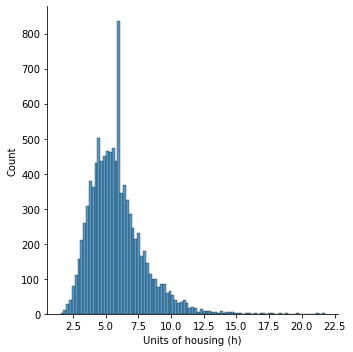

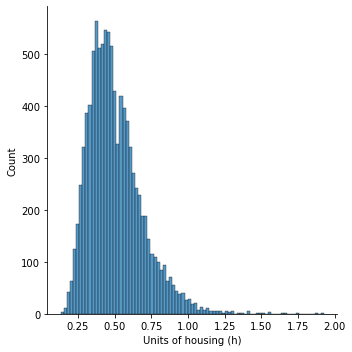

In [17]:
# set the number of households and the seed number
N = 10000
seed = 1

# draw list of 10,000 cash endowments from the lognormal distributions
from statistics import mean
np.random.seed(seed)
m_sim = np.random.lognormal(mean = -0.4,sigma = 0.35,size = N).tolist()

def tax_burden(h, parameters):
    """ Calculates the cash amount of taxes paid by the individual household given the choice of house quality      
    
    Args:
        h (float): housing consumption
        parameters (dict): dictionary of parameters wrt. policy and preferences
        
    Returns:
        taxes (float): cash amount of taxes paid
    """
    return parameters['tau_g'] * h * parameters['eps'] + parameters['tau_p'] * max(h * parameters['eps'] - parameters['p_bar'], 0)

# calculate the average tax burden
household_tax = []
for m in m_sim:
    parameters['m'] = m
    h = solver(parameters)
    household_tax.append(tax_burden(h, parameters)) 

avg_tax_burden = mean(household_tax)
print(f'\n The average household pays {avg_tax_burden:.4f} of its cash endowment as taxes.\n')

# Now, we plot the distributions of h and c given the simulations of the cash endowment.

import seaborn as sns

solutions = []

for m in m_sim:
    parameters['m'] = m
    h = solver(parameters)
    c = budget_constraint(h, parameters)
    solutions.append([m, h, c])

solutions = pd.DataFrame(solutions, columns=["m", "h", "c"])

sns.displot(solutions, x="h")
plt.xlabel("Units of housing (h)")
plt.show()

sns.displot(solutions, x="c")
plt.xlabel("Units of housing (h)")
plt.show()

What is interesting from the plots is that households stop buying more expensive houses when reaching the endowment region of rougly m = 0.72. Therefore, there is an outlier of households who buy houses of the approximate value of h = 6.

# Problem 4 - Tax reform

Now, the government imposes a tax reform which alternates some of the given parameters. We implement the new parameters by creating a new dictionary, and running the optimization algorithm on the N households with different cash endowments.

In [4]:
# Create a dictionary containing the new parameters
parameters_reform = {'phi': 0.3, 'eps': 0.8, 'r': 0.03, 'tau_g': 0.01, 
              'tau_p': 0.009, 'p_bar': 8, 'm': 0.5}

household_tax_reform = []
for m in m_sim:
    parameters_reform['m'] = m
    h = solver(parameters_reform)
    household_tax_reform.append(tax_burden(h, parameters_reform)) 

avg_tax_burden_reform = mean(household_tax_reform)
print(f'\nThe average household pays {avg_tax_burden_reform:.4f} of its cash endowment as taxes under the new tax schedule.')
print(f'This means that the tax reform has increased the average tax burden by {avg_tax_burden_reform - avg_tax_burden:.3f}.')


The average household pays 0.0450 of its cash endowment as taxes under the new tax schedule.
This means that the tax reform has increased the average tax burden by 0.009.


# Problem 5 - re-engineering the tax reform

Now, the government wants to re-engineer the tax reform, such that the average tax burden is unchanged between the tax schedules. They want to do this by imposing the new parameters, while lowering $\tau_g$, so the tax effects are offset. We solve this by creating a while-loop, which changes iterates over different values of $\tau_g$, until it finds a value of $\tau_g$ that gives a tax burden equal to the one before the tax reform.

In [25]:
parameters_reform_new = {'phi': 0.3, 'eps': 0.8, 'r': 0.03, 'tau_g': 0.01, 
              'tau_p': 0.009, 'p_bar': 8, 'm': 0.5}

tau_g_iter = np.arange(0, 0.019, 0.00001).tolist()

# set the number of households and the seed number
N_new = 10
np.random.seed(seed)

# draw list of 10 cash endowments from the lognormal distribution
m_sim_new = np.random.lognormal(mean = -0.4,sigma = 0.35,size = N_new).tolist()

# reset the average tax burden to zero
avg_tax_burden_reform = 0 

# iterate over different values of tau_g to find one that equalizes the tax burden between the tax schedules
while avg_tax_burden_reform < avg_tax_burden:
    for tau_g in tau_g_iter:
        parameters_reform_new['tau_g'] = tau_g
        household_tax_reform = []

        for m in m_sim_new:
            parameters_reform_new['m'] = m
            h = solver(parameters_reform_new)
            household_tax_reform.append(tax_burden(h, parameters_reform_new))
    
        avg_tax_burden_reform = mean(household_tax_reform)
        if(avg_tax_burden_reform >= avg_tax_burden):    
            break

print(f'With tau_g = {tau_g:.4f}, the tax burden is {avg_tax_burden_reform:.4f}, which is equal to that of the original tax schedule.')

With tau_g = 0.0078, the tax burden is 0.0363, which is equal to that of the original tax schedule.


Thus, for $\tau_g=0.0078$, the government obtains an unchanged average tax burden under the new tax schedule.

# Conclusion

As a concluding remark, we note that tax reform to be implemented i 2024 will, under some assumptions, increase the the average tax burden of the Danish households. It is important to interpret this conclusion with some caution due to the distributional assumptions and the assumption of homogenous, Cobb-Douglas utility maximizing households.

One of the main insights from the analysis is that the government is indeed able to maintain the previously known (average) tax burden between the two tax schedules. This is done by lowering $\tau_g$, which is the base tax rate paid by households.